In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
my_palette = sns.color_palette(my_colors) # Create a seaborn palette object
sns.set_palette(my_palette)  # Use the custom palette with a seaborn function
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# train = pd.read_csv('/kaggle/input/attrition-dataset/train.csv')
train = pd.read_csv('train.csv')
# test = pd.read_csv('/kaggle/input/attrition-dataset/test.csv')
test = pd.read_csv('test.csv')
# add_train = pd.read_csv('/kaggle/input/attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
add_train = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

display(train.head(), test.head(), add_train.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
train.shape, test.shape, add_train.shape

((1677, 35), (1119, 34), (1470, 35))

In [5]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')
add_train.columns = add_train.columns.str.replace(' ', '')

In [6]:
data = [train, test, add_train]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [7]:
# different column names

set(train.columns) ^ set(add_train.columns)

{'EmployeeNumber', 'id'}

In [8]:
common_columns = set(train.columns) & set(add_train.columns)
common_columns = list(common_columns)

# Select only the common columns for both data frames
train = train[common_columns]
add_train = add_train[common_columns]

In [9]:
# Check if the columns are the same
if set(add_train.columns) == set(train.columns):
    print("Columns in train and add_train are the same.")
else:
    different_columns = set(train.columns).symmetric_difference(set(add_train.columns))
    print("Columns in train and add_train are different.")
    print("Different columns:", different_columns)

Columns in train and add_train are the same.


In [10]:
train.shape, add_train.shape

((1677, 34), (1470, 34))

In [11]:
display(train.head(), add_train.head())

,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,EmployeeCount,StockOptionLevel,Age,Over18,PerformanceRating,StandardHours,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance
0,Yes,3,2,0,1,Medical,3,13,24,2,5099,Travel_Frequently,0,42,10,8,4,Research & Development,Male,Laboratory Technician,7,1,1,36,Y,3,80,1,4,599,Married,2596,10,3
1,No,3,3,2,1,Other,3,17,8,4,10778,Travel_Rarely,0,46,4,3,1,Sales,Male,Sales Representative,0,1,1,35,Y,3,80,1,1,921,Married,2899,4,3
2,No,3,3,2,0,Marketing,3,17,26,4,16495,Travel_Rarely,0,80,4,2,3,Sales,Male,Sales Executive,1,1,2,32,Y,3,80,2,4,718,Divorced,4627,3,3
3,No,3,1,0,3,Medical,3,14,2,3,13384,Travel_Rarely,0,40,15,2,3,Research & Development,Female,Healthcare Representative,0,1,0,38,Y,3,80,2,1,1488,Married,5347,6,1
4,Yes,4,0,14,1,Medical,3,13,5,3,19805,Travel_Rarely,1,37,31,10,2,Research & Development,Female,Manager,4,1,0,50,Y,3,80,5,1,1017,Single,19033,31,3


,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,EmployeeCount,StockOptionLevel,Age,Over18,PerformanceRating,StandardHours,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance
0,Yes,2,0,4,8,Life Sciences,3,11,1,1,19479,Travel_Rarely,Yes,94,8,5,2,Sales,Female,Sales Executive,0,1,0,41,Y,3,80,2,4,1102,Single,5993,6,1
1,No,1,3,7,1,Life Sciences,2,23,8,4,24907,Travel_Frequently,No,61,10,7,3,Research & Development,Male,Research Scientist,1,1,1,49,Y,4,80,2,2,279,Married,5130,10,3
2,Yes,2,3,0,6,Other,2,15,2,2,2396,Travel_Rarely,Yes,92,7,0,4,Research & Development,Male,Laboratory Technician,0,1,0,37,Y,3,80,1,3,1373,Single,2090,0,3
3,Yes,4,3,7,1,Life Sciences,3,11,3,3,23159,Travel_Frequently,No,56,8,0,4,Research & Development,Female,Research Scientist,3,1,0,33,Y,3,80,1,3,1392,Married,2909,8,3
4,No,1,3,2,9,Medical,3,12,2,4,16632,Travel_Rarely,No,40,6,2,1,Research & Development,Male,Laboratory Technician,2,1,1,27,Y,3,80,1,2,591,Married,3468,2,3


In [12]:
target = [train, add_train]
for i in target:
    print(i['Attrition'].value_counts())

Attrition
0    1477
1     200
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [13]:
print(train.duplicated().sum())
print(test.duplicated().sum())
print(add_train.duplicated().sum())

0
0
0


In [14]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print(100 * '-')

OverTime
No     1277
Yes     400
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      1064
Female     613
Name: count, dtype: int64
----------------------------------------

In [15]:
for i in add_train.select_dtypes(exclude='number').columns:
    print(add_train[i].value_counts())
    print(100 * '-')

OverTime
No     1054
Yes     416
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------------

In [16]:
for i in test.select_dtypes(exclude='number').columns:
    print(test[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        799
Travel_Frequently    212
Non-Travel           108
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    777
Sales                     306
Human Resources            36
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       519
Medical             345
Marketing           102
Technical Degree     96
Other                45
Human Resources      12
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      690
Female    429
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              240
Laboratory Technician        230
Research Scientist           230


In [17]:
# encode attrition in add_train to numerical
from sklearn.preprocessing import LabelEncoder
add_train['Attrition'] = add_train['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
print(train.columns.tolist());print()
print(add_train.columns.tolist())

['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'Attrition', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 'YearsSinceLastPromotion', 'EmployeeCount', 'StockOptionLevel', 'Age', 'Over18', 'PerformanceRating', 'StandardHours', 'JobLevel', 'JobSatisfaction', 'DailyRate', 'MaritalStatus', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance']

['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'Attrition', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 'YearsSinceLastPromotion', 'Emp

In [19]:
# concatenate train and add_train

common_columns = list(set(train.columns) & set(add_train.columns))

# Concatenate and keep only common columns
concatenated_train = pd.concat([train[common_columns], add_train[common_columns]], ignore_index=True)

# Drop duplicates based on all common columns
concatenated_train = concatenated_train.drop_duplicates()
concatenated_train.head()

,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,EmployeeCount,StockOptionLevel,Age,Over18,PerformanceRating,StandardHours,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance
0,Yes,3,2,0,1,Medical,3,13,24,2,5099,Travel_Frequently,0,42,10,8,4,Research & Development,Male,Laboratory Technician,7,1,1,36,Y,3,80,1,4,599,Married,2596,10,3
1,No,3,3,2,1,Other,3,17,8,4,10778,Travel_Rarely,0,46,4,3,1,Sales,Male,Sales Representative,0,1,1,35,Y,3,80,1,1,921,Married,2899,4,3
2,No,3,3,2,0,Marketing,3,17,26,4,16495,Travel_Rarely,0,80,4,2,3,Sales,Male,Sales Executive,1,1,2,32,Y,3,80,2,4,718,Divorced,4627,3,3
3,No,3,1,0,3,Medical,3,14,2,3,13384,Travel_Rarely,0,40,15,2,3,Research & Development,Female,Healthcare Representative,0,1,0,38,Y,3,80,2,1,1488,Married,5347,6,1
4,Yes,4,0,14,1,Medical,3,13,5,3,19805,Travel_Rarely,1,37,31,10,2,Research & Development,Female,Manager,4,1,0,50,Y,3,80,5,1,1017,Single,19033,31,3


In [20]:
concatenated_train.shape, test.shape

((3147, 34), (1119, 34))

In [21]:
print(concatenated_train.columns.tolist());print()
print(test.columns.tolist())

['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'Attrition', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 'YearsSinceLastPromotion', 'EmployeeCount', 'StockOptionLevel', 'Age', 'Over18', 'PerformanceRating', 'StandardHours', 'JobLevel', 'JobSatisfaction', 'DailyRate', 'MaritalStatus', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance']

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction

In [22]:
# Specify the order of columns including "Attrition"
desired_order = concatenated_train.columns.tolist()

# Exclude 'Attrition' from the order
desired_order.remove('Attrition')

# Filter and reorder columns in test
test = test[desired_order]
print("Aligned test columns:", test.columns.tolist())

Aligned test columns: ['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 'YearsSinceLastPromotion', 'EmployeeCount', 'StockOptionLevel', 'Age', 'Over18', 'PerformanceRating', 'StandardHours', 'JobLevel', 'JobSatisfaction', 'DailyRate', 'MaritalStatus', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance']


In [23]:
concatenated_train.head(2)

,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,EmployeeCount,StockOptionLevel,Age,Over18,PerformanceRating,StandardHours,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance
0,Yes,3,2,0,1,Medical,3,13,24,2,5099,Travel_Frequently,0,42,10,8,4,Research & Development,Male,Laboratory Technician,7,1,1,36,Y,3,80,1,4,599,Married,2596,10,3
1,No,3,3,2,1,Other,3,17,8,4,10778,Travel_Rarely,0,46,4,3,1,Sales,Male,Sales Representative,0,1,1,35,Y,3,80,1,1,921,Married,2899,4,3


In [24]:
test.head(2)

,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,EmployeeCount,StockOptionLevel,Age,Over18,PerformanceRating,StandardHours,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance
0,No,1,2,0,1,Medical,3,12,1,4,17778,Non-Travel,43,1,0,4,Research & Development,Male,Laboratory Technician,0,1,0,19,Y,3,80,1,3,992,Single,2318,1,2
1,Yes,4,3,2,6,Marketing,3,12,4,3,12421,Travel_Rarely,67,7,2,3,Sales,Male,Sales Executive,2,1,1,45,Y,3,80,2,1,1136,Divorced,5486,2,3


In [25]:
concatenated_train.shape, test.shape

((3147, 34), (1119, 33))

In [26]:
data = [concatenated_train, test]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   OverTime                  3147 non-null   object
 1   Education                 3147 non-null   int64 
 2   TrainingTimesLastYear     3147 non-null   int64 
 3   YearsInCurrentRole        3147 non-null   int64 
 4   NumCompaniesWorked        3147 non-null   int64 
 5   EducationField            3147 non-null   object
 6   JobInvolvement            3147 non-null   int64 
 7   PercentSalaryHike         3147 non-null   int64 
 8   DistanceFromHome          3147 non-null   int64 
 9   RelationshipSatisfaction  3147 non-null   int64 
 10  MonthlyRate               3147 non-null   int64 
 11  BusinessTravel            3147 non-null   object
 12  Attrition                 3147 non-null   int64 
 13  HourlyRate                3147 non-null   int64 
 14  TotalWorkingYears       

## EDA

In [27]:
concatenated_train.select_dtypes(exclude='number').columns

Index(['OverTime', 'EducationField', 'BusinessTravel', 'Department', 'Gender',
       'JobRole', 'Over18', 'MaritalStatus'],
      dtype='object')

In [28]:
# review = concatenated_train[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
#                 'Over18', 'OverTime', 'MaritalStatus', 'Attrition']]
# for i in review.columns:
#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set_title(i)
#     plt.show()

In [29]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(train[i])
#     plt.show();

In [30]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(y=train[i])
#     plt.xlabel(i)
#     plt.show();

## Feature Engineering

In [31]:
print(concatenated_train.shape, test.shape)

(3147, 34) (1119, 33)


Explanation of the columns in the dataset:

1. **id:** Unique identifier for each employee.

2. **Age:** The age of the employee.

3. **BusinessTravel:** The frequency of business travel. This could be "Non-Travel," "Travel_Rarely," or "Travel_Frequently."

4. **DailyRate:** The daily rate of pay for the employee.

5. **Department:** The department in which the employee works ('Research & Development', 'Sales', 'Human Resources').

6. **DistanceFromHome:** The distance of the employee's home from the workplace.

7. **Education:** The level of education achieved by the employee.

8. **EducationField:** The field of education of the employee ('Medical', 'Other', 'Marketing', 'Life Sciences', 'Technical Degree', 'Human Resources').

9. **EmployeeCount:** The count of employees. This column seems to have a constant value and may be dropped as it doesn't provide useful information.

10. **EnvironmentSatisfaction:** Employee's satisfaction with their work environment.

11. **Gender:** The gender of the employee.

12. **HourlyRate:** The hourly rate of pay for the employee.

13. **JobInvolvement:** The level of job involvement.

14. **JobLevel:** The level of the employee's job within the company hierarchy.

15. **JobRole:** The role/title of the employee ('Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director').

16. **JobSatisfaction:** Employee's satisfaction with their job.

17. **MaritalStatus:** The marital status of the employee ('Married', 'Divorced', 'Single').

18. **MonthlyIncome:** The monthly income of the employee.

19. **MonthlyRate:** The monthly rate of pay for the employee.

20. **NumCompaniesWorked:** The number of companies the employee has worked for.

21. **Over18:** Indicates if the employee is over 18 years old. This column may be dropped if all values are the same.

22. **OverTime:** Whether the employee works overtime or not.

23. **PercentSalaryHike:** The percentage increase in salary.

24. **PerformanceRating:** The performance rating of the employee.

25. **RelationshipSatisfaction:** Employee's satisfaction with their relationships at work.

26. **StandardHours:** The standard number of working hours.

27. **StockOptionLevel:** The level of stock options granted to the employee.

28. **TotalWorkingYears:** The total number of years the employee has been working.

29. **TrainingTimesLastYear:** The number of training times the employee attended last year.

30. **WorkLifeBalance:** Employee's perception of work-life balance.

31. **YearsAtCompany:** The number of years the employee has spent at the current company.

32. **YearsInCurrentRole:** The number of years the employee has been in the current role.

33. **YearsSinceLastPromotion:** The number of years since the last promotion.

34. **YearsWithCurrManager:** The number of years the employee has been with the current manager.

35. **Attrition:** The target variable indicating whether the employee has attrited (left the company) or not "Yes" or "No."

In [32]:
train_df = concatenated_train.copy()
test_df = test.copy()

# Income to DailyRate Ratio
train_df['IncomeToDailyRateRatio'] = concatenated_train['MonthlyIncome'] / concatenated_train['DailyRate']
test_df['IncomeToDailyRateRatio'] = test['MonthlyIncome'] / test['DailyRate']

# Education and JobLevel Interaction
train_df['EduJobInteraction'] = concatenated_train['Education'] * concatenated_train['JobLevel']
test_df['EduJobInteraction'] = test['Education'] * test['JobLevel']

# # Income per Year of Experience
# train_df['IncomePerExperience'] = concatenated_train['MonthlyIncome'] / concatenated_train['TotalWorkingYears']
# test_df['IncomePerExperience'] = test_df['MonthlyIncome'] / test_df['TotalWorkingYears']

# Job Change Rate
# train_df['JobChangeRate'] = concatenated_train['NumCompaniesWorked'] / concatenated_train['TotalWorkingYears']
# test_df['JobChangeRate'] = test_df['NumCompaniesWorked'] / test_df['TotalWorkingYears']

# Tenure-to-Age Ratio
train_df['TenureToAgeRatio'] = concatenated_train['TotalWorkingYears'] / concatenated_train['Age']
test_df['TenureToAgeRatio'] = test_df['TotalWorkingYears'] / test_df['Age']

# Total Satisfaction Score
train_df['TotalSatisfaction'] = concatenated_train['EnvironmentSatisfaction'] + concatenated_train['JobSatisfaction'] + concatenated_train['RelationshipSatisfaction']
test_df['TotalSatisfaction'] = test['EnvironmentSatisfaction'] + test['JobSatisfaction'] + test['RelationshipSatisfaction']

# Round floats
train_df[['IncomeToDailyRateRatio']] = train_df[['IncomeToDailyRateRatio']].round(2)
test_df[['IncomeToDailyRateRatio']] = test_df[['IncomeToDailyRateRatio']].round(2)
train_df[['TenureToAgeRatio']] = train_df[['TenureToAgeRatio']].round(2)
test_df[['TenureToAgeRatio']] = test_df[['TenureToAgeRatio']].round(2)

# Remove redundant columns
train_df = train_df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
test_df = test_df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

display(train_df.head())
display(test_df.head())

,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,StockOptionLevel,Age,PerformanceRating,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
0,Yes,3,2,0,1,Medical,3,13,24,2,5099,Travel_Frequently,0,42,10,8,4,Research & Development,Male,Laboratory Technician,7,1,36,3,1,4,599,Married,2596,10,3,4.33,3,0.28,10
1,No,3,3,2,1,Other,3,17,8,4,10778,Travel_Rarely,0,46,4,3,1,Sales,Male,Sales Representative,0,1,35,3,1,1,921,Married,2899,4,3,3.15,3,0.11,6
2,No,3,3,2,0,Marketing,3,17,26,4,16495,Travel_Rarely,0,80,4,2,3,Sales,Male,Sales Executive,1,2,32,3,2,4,718,Divorced,4627,3,3,6.44,6,0.12,11
3,No,3,1,0,3,Medical,3,14,2,3,13384,Travel_Rarely,0,40,15,2,3,Research & Development,Female,Healthcare Representative,0,0,38,3,2,1,1488,Married,5347,6,1,3.59,6,0.39,7
4,Yes,4,0,14,1,Medical,3,13,5,3,19805,Travel_Rarely,1,37,31,10,2,Research & Development,Female,Manager,4,0,50,3,5,1,1017,Single,19033,31,3,18.71,20,0.62,6


,OverTime,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,EducationField,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,BusinessTravel,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,Department,Gender,JobRole,YearsSinceLastPromotion,StockOptionLevel,Age,PerformanceRating,JobLevel,JobSatisfaction,DailyRate,MaritalStatus,MonthlyIncome,YearsAtCompany,WorkLifeBalance,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
0,No,1,2,0,1,Medical,3,12,1,4,17778,Non-Travel,43,1,0,4,Research & Development,Male,Laboratory Technician,0,0,19,3,1,3,992,Single,2318,1,2,2.34,1,0.05,11
1,Yes,4,3,2,6,Marketing,3,12,4,3,12421,Travel_Rarely,67,7,2,3,Sales,Male,Sales Executive,2,1,45,3,2,1,1136,Divorced,5486,2,3,4.83,8,0.16,7
2,Yes,3,2,7,4,Life Sciences,3,13,13,2,23577,Travel_Rarely,41,13,7,4,Research & Development,Male,Research Scientist,1,2,37,3,1,4,155,Divorced,2741,7,2,17.68,3,0.35,10
3,No,4,2,10,1,Life Sciences,2,13,1,3,20364,Travel_Rarely,89,14,8,3,Research & Development,Male,Healthcare Representative,11,0,32,3,2,3,688,Single,5228,14,2,7.60,8,0.44,9
4,No,1,5,0,1,Life Sciences,3,14,9,1,15178,Travel_Frequently,79,1,0,3,Research & Development,Male,Laboratory Technician,0,0,29,3,1,4,464,Single,1223,1,3,2.64,1,0.03,8


In [33]:
display(train_df.describe(), test_df.describe())

,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,Attrition,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,YearsSinceLastPromotion,StockOptionLevel,Age,PerformanceRating,JobLevel,JobSatisfaction,DailyRate,MonthlyIncome,YearsAtCompany,WorkLifeBalance,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,2.926279,2.763902,4.183985,2.630124,2.757865,15.046393,8.921513,2.733079,14556.604067,0.138862,66.907531,10.975850,4.156975,2.741023,2.076263,0.755323,36.451223,3.139816,2.029234,2.762313,850.586273,6339.397521,6.900858,2.765809,10.749609,6.042898,0.284913,8.236416
std,1.032051,1.214918,3.601691,2.488848,0.680183,3.537252,7.961278,1.079454,7117.334257,0.345858,19.877918,7.509438,3.572003,1.089733,3.130744,0.810688,8.815861,0.346851,1.094590,1.100224,390.859919,4610.584686,5.998015,0.675707,13.943813,4.133931,0.153195,1.861896
min,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,636.000000,0.000000,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,3.000000,1.000000,1.000000,102.000000,1009.000000,0.000000,1.000000,0.740000,1.000000,0.000000,3.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,12.000000,2.000000,2.000000,8306.000000,0.000000,50.000000,6.000000,2.000000,2.000000,0.000000,0.000000,30.000000,3.000000,1.000000,2.000000,543.000000,2888.000000,3.000000,2.000000,3.640000,3.000000,0.180000,7.000000
50%,3.000000,3.000000,3.000000,1.000000,3.000000,14.000000,7.000000,3.000000,14908.000000,0.000000,67.000000,9.000000,3.000000,3.000000,1.000000,1.000000,35.000000,3.000000,2.000000,3.000000,852.000000,4877.000000,5.000000,3.000000,6.400000,4.000000,0.260000,8.000000
75%,4.000000,3.000000,7.000000,4.000000,3.000000,17.000000,13.000000,4.000000,20744.500000,0.000000,84.000000,15.000000,7.000000,4.000000,2.000000,1.000000,42.000000,3.000000,3.000000,4.000000,1198.500000,7725.000000,9.000000,3.000000,12.155000,8.000000,0.390000,10.000000
max,15.000000,6.000000,18.000000,9.000000,4.000000,25.000000,29.000000,4.000000,26999.000000,1.000000,100.000000,41.000000,17.000000,4.000000,15.000000,3.000000,60.000000,4.000000,7.000000,4.000000,3921.000000,19999.000000,41.000000,4.000000,185.060000,25.000000,1.050000,12.000000


,Education,TrainingTimesLastYear,YearsInCurrentRole,NumCompaniesWorked,JobInvolvement,PercentSalaryHike,DistanceFromHome,RelationshipSatisfaction,MonthlyRate,HourlyRate,TotalWorkingYears,YearsWithCurrManager,EnvironmentSatisfaction,YearsSinceLastPromotion,StockOptionLevel,Age,PerformanceRating,JobLevel,JobSatisfaction,DailyRate,MonthlyIncome,YearsAtCompany,WorkLifeBalance,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,2.941912,2.795353,4.184093,2.544236,2.741734,14.763181,8.667560,2.722073,14712.646113,68.226095,10.685433,4.308311,2.736372,2.076854,0.758713,36.147453,3.109026,1.999106,2.767650,883.550492,6153.750670,7.016979,2.759607,10.311984,5.976765,0.281903,8.226095
std,1.012986,1.195600,3.533139,2.460340,0.652751,3.397653,7.772384,1.058472,6916.185207,19.495282,7.251628,3.729282,1.106668,3.278022,0.826037,8.786102,0.311811,1.091109,1.103576,366.427230,4558.597502,5.975403,0.656830,43.343737,4.147051,0.153535,1.903720
min,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,959.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,3.000000,1.000000,1.000000,6.000000,464.000000,0.000000,1.000000,0.350000,1.000000,0.000000,3.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,12.000000,2.000000,2.000000,8821.000000,52.000000,6.000000,2.000000,2.000000,0.000000,0.000000,30.000000,3.000000,1.000000,2.000000,589.000000,2853.000000,3.000000,2.000000,3.530000,3.000000,0.180000,7.000000
50%,3.000000,3.000000,3.000000,1.000000,3.000000,14.000000,7.000000,3.000000,15211.000000,71.000000,9.000000,3.000000,3.000000,1.000000,1.000000,35.000000,3.000000,2.000000,3.000000,889.000000,4721.000000,5.000000,3.000000,5.850000,4.000000,0.260000,8.000000
75%,4.000000,3.000000,7.000000,4.000000,3.000000,17.000000,12.000000,4.000000,20652.000000,85.000000,14.000000,7.000000,4.000000,2.000000,1.000000,41.000000,3.000000,2.000000,4.000000,1206.000000,7082.500000,10.000000,3.000000,10.430000,8.000000,0.375000,10.000000
max,5.000000,6.000000,17.000000,17.000000,4.000000,25.000000,29.000000,4.000000,26999.000000,100.000000,38.000000,17.000000,4.000000,15.000000,4.000000,59.000000,4.000000,5.000000,4.000000,1499.000000,19999.000000,36.000000,4.000000,1416.670000,25.000000,1.030000,12.000000


In [34]:
# train_df[train_df['IncomePerExperience'] == np.isinf(train_df['IncomePerExperience'])]

In [35]:
data = [train_df, test_df]
for i in data:
    print(i.isnull().any().sum())
    print('-' *100)

0
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------


In [36]:
data = [train_df, test_df]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  3147 non-null   object 
 1   Education                 3147 non-null   int64  
 2   TrainingTimesLastYear     3147 non-null   int64  
 3   YearsInCurrentRole        3147 non-null   int64  
 4   NumCompaniesWorked        3147 non-null   int64  
 5   EducationField            3147 non-null   object 
 6   JobInvolvement            3147 non-null   int64  
 7   PercentSalaryHike         3147 non-null   int64  
 8   DistanceFromHome          3147 non-null   int64  
 9   RelationshipSatisfaction  3147 non-null   int64  
 10  MonthlyRate               3147 non-null   int64  
 11  BusinessTravel            3147 non-null   object 
 12  Attrition                 3147 non-null   int64  
 13  HourlyRate                3147 non-null   int64  
 14  TotalWor

## Data Encoding

In [37]:
print(train_df.columns.tolist());print()
print(test_df.columns.tolist())

['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'Attrition', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 'YearsSinceLastPromotion', 'StockOptionLevel', 'Age', 'PerformanceRating', 'JobLevel', 'JobSatisfaction', 'DailyRate', 'MaritalStatus', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance', 'IncomeToDailyRateRatio', 'EduJobInteraction', 'TenureToAgeRatio', 'TotalSatisfaction']

['OverTime', 'Education', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'EducationField', 'JobInvolvement', 'PercentSalaryHike', 'DistanceFromHome', 'RelationshipSatisfaction', 'MonthlyRate', 'BusinessTravel', 'HourlyRate', 'TotalWorkingYears', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'Department', 'Gender', 'JobRole', 

In [38]:
for column in train_df.select_dtypes(exclude='number').columns:
    print(f"Column: {column}")
    print("Train Data:")
    print(train_df[column].unique())
    print("Test Data:")
    print(test_df[column].unique())
    print()

Column: OverTime
Train Data:
['Yes' 'No']
Test Data:
['No' 'Yes']

Column: EducationField
Train Data:
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
Test Data:
['Medical' 'Marketing' 'Life Sciences' 'Technical Degree' 'Other'
 'Human Resources']

Column: BusinessTravel
Train Data:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Test Data:
['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']

Column: Department
Train Data:
['Research & Development' 'Sales' 'Human Resources']
Test Data:
['Research & Development' 'Sales' 'Human Resources']

Column: Gender
Train Data:
['Male' 'Female']
Test Data:
['Male' 'Female']

Column: JobRole
Train Data:
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
Test Data:
['Laboratory Technician' 'Sales Executive' 'Research Scientist'
 'Healthcare Representative' 'Manager' 'Human R

In [39]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for MaritalStatus
ordinal_encoder = OrdinalEncoder(categories=[['Single', 'Married', 'Divorced']])
train_df['MaritalStatus'] = ordinal_encoder.fit_transform(train_df[['MaritalStatus']])
train_df['MaritalStatus'] = train_df['MaritalStatus'].astype(int)

test_df['MaritalStatus'] = ordinal_encoder.transform(test_df[['MaritalStatus']])
test_df['MaritalStatus'] = test_df['MaritalStatus'].astype(int)

print(train_df['MaritalStatus'].value_counts(), '\n')
print(test_df['MaritalStatus'].value_counts())

MaritalStatus
1    1446
0    1047
2     654
Name: count, dtype: int64 

MaritalStatus
1    524
0    394
2    201
Name: count, dtype: int64


In [40]:
print(train_df.select_dtypes(exclude='number').columns)
print(test_df.select_dtypes(exclude='number').columns)

Index(['OverTime', 'EducationField', 'BusinessTravel', 'Department', 'Gender',
       'JobRole'],
      dtype='object')
Index(['OverTime', 'EducationField', 'BusinessTravel', 'Department', 'Gender',
       'JobRole'],
      dtype='object')


**OneHot Encoding**

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = encoder.fit_transform(train_df[['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']])
test_encoded = encoder.transform(test_df[['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']])

train_df_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']))
test_df_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']))

train_df_encoded = train_df_encoded.astype(int)
test_df_encoded = test_df_encoded.astype(int)
display(train_df_encoded.head(), test_df_encoded.head())

,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1


,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1
2,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [66]:
numerical_columns_train = train_df.select_dtypes(include='number').columns.tolist()
numerical_columns_test = test_df.select_dtypes(include='number').columns.tolist()

# Extract numerical features from the original datasets
train_df_num = train_df[numerical_columns_train]
test_df_num = test_df[numerical_columns_test]

# Concatenate numerical features with the one-hot encoded categorical columns
train_new = pd.concat([train_df_num, train_df_encoded], axis=1)
test_new = pd.concat([test_df_num, test_df_encoded], axis=1)
display(train_new.head(), test_new.head())

,Education,RelationshipSatisfaction,HourlyRate,JobSatisfaction,EnvironmentSatisfaction,Age,TrainingTimesLastYear,JobInvolvement,PerformanceRating,Attrition,WorkLifeBalance,YearsSinceLastPromotion,MonthlyRate,DistanceFromHome,YearsWithCurrManager,YearsInCurrentRole,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,JobLevel,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,DailyRate,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,3,2,42,4,4,36,2,3,3,0,3,7,5099,24,8,0,2596,1,10,10,1,1,1,13,599,4.33,3,0.28,10,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
1,3,4,46,1,1,35,3,3,3,0,3,0,10778,8,3,2,2899,1,4,4,1,1,1,17,921,3.15,3,0.11,6,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,3,4,80,4,3,32,3,3,3,0,3,1,16495,26,2,2,4627,2,4,3,2,2,0,17,718,6.44,6,0.12,11,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,3,3,40,1,3,38,1,3,3,0,1,0,13384,2,2,0,5347,0,15,6,2,1,3,14,1488,3.59,6,0.39,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,4,3,37,1,2,50,0,3,3,1,3,4,19805,5,10,14,19033,0,31,31,5,0,1,13,1017,18.71,20,0.62,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1


,Education,RelationshipSatisfaction,HourlyRate,JobSatisfaction,EnvironmentSatisfaction,Age,TrainingTimesLastYear,JobInvolvement,PerformanceRating,WorkLifeBalance,YearsSinceLastPromotion,MonthlyRate,DistanceFromHome,YearsWithCurrManager,YearsInCurrentRole,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,JobLevel,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,DailyRate,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,1,4,43,3,4,19,2,3,3,2,0,17778,1,0,0,2318,0,1,1,1,0,1,12,992,2.34,1,0.05,11,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,4,3,67,1,3,45,3,3,3,3,2,12421,4,2,2,5486,1,7,2,2,2,6,12,1136,4.83,8,0.16,7,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1
2,3,2,41,4,4,37,2,3,3,2,1,23577,13,7,7,2741,2,13,7,1,2,4,13,155,17.68,3,0.35,10,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1
3,4,3,89,3,3,32,2,2,3,2,11,20364,1,8,10,5228,0,14,14,2,0,1,13,688,7.60,8,0.44,9,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
4,1,1,79,4,3,29,5,3,3,3,0,15178,9,0,0,1223,0,1,1,1,0,1,14,464,2.64,1,0.03,8,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [77]:
train_with_infinity = np.any(np.isinf(train_new), axis=1)
test_with_infinity = np.any(np.isinf(test_new), axis=1)

# Print rows where at least one element is infinite
print(train_new[train_with_infinity].shape)
print(test_new[test_with_infinity].shape)

(0, 48)
(0, 47)


In [78]:
train_new.shape, test_new.shape

((3147, 48), (1119, 47))

**Target Encoding**

In [79]:
import category_encoders as ce

# Extract target variable and features
X = train_df.drop(['Attrition'], axis=1)
y = train_df['Attrition']

# Select categorical columns
categorical_columns = ['JobRole', 'Gender', 'EducationField', 'Department', 'OverTime', 'BusinessTravel']

# Perform target encoding on training set
encoder = ce.TargetEncoder(cols=categorical_columns)
X_encoded = encoder.fit_transform(X, y)

# Perform target encoding on test set
test_encoded = encoder.transform(test_df)
display(X_encoded.head(2), test_encoded.head(2))

,Education,RelationshipSatisfaction,HourlyRate,JobRole,JobSatisfaction,EnvironmentSatisfaction,EducationField,Age,BusinessTravel,TrainingTimesLastYear,JobInvolvement,PerformanceRating,WorkLifeBalance,YearsSinceLastPromotion,MonthlyRate,Gender,DistanceFromHome,YearsWithCurrManager,YearsInCurrentRole,MonthlyIncome,StockOptionLevel,Department,TotalWorkingYears,YearsAtCompany,JobLevel,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,DailyRate,OverTime,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
0,3,2,42,0.20742,4,4,0.124383,36,0.223048,2,3,3,3,7,5099,0.147996,24,8,0,2596,1,0.121711,10,10,1,1,1,13,599,0.263480,4.33,3,0.28,10
1,3,4,46,0.36875,1,1,0.103659,35,0.128590,3,3,3,3,0,10778,0.147996,8,3,2,2899,1,0.173391,4,4,1,1,1,17,921,0.095238,3.15,3,0.11,6


,Education,RelationshipSatisfaction,HourlyRate,JobRole,JobSatisfaction,EnvironmentSatisfaction,EducationField,Age,BusinessTravel,TrainingTimesLastYear,JobInvolvement,PerformanceRating,WorkLifeBalance,YearsSinceLastPromotion,MonthlyRate,Gender,DistanceFromHome,YearsWithCurrManager,YearsInCurrentRole,MonthlyIncome,StockOptionLevel,Department,TotalWorkingYears,YearsAtCompany,JobLevel,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,DailyRate,OverTime,IncomeToDailyRateRatio,EduJobInteraction,TenureToAgeRatio,TotalSatisfaction
0,1,4,43,0.207420,3,4,0.124383,19,0.061594,2,3,3,2,0,17778,0.147996,1,0,0,2318,0,0.121711,1,1,1,0,1,12,992,0.095238,2.34,1,0.05,11
1,4,3,67,0.139501,1,3,0.196141,45,0.128590,3,3,3,3,2,12421,0.147996,4,2,2,5486,1,0.173391,7,2,2,2,6,12,1136,0.263480,4.83,8,0.16,7


In [80]:
X_encoded.shape, test_encoded.shape

((3147, 34), (1119, 34))

In [82]:
train_with_infinity = np.any(np.isinf(X_encoded), axis=1)
test_with_infinity = np.any(np.isinf(test_encoded), axis=1)

# Print rows where at least one element is infinite
print(X_encoded[train_with_infinity].shape)
print(test_encoded[test_with_infinity].shape)

(0, 34)
(0, 34)


In [83]:
# # Drop rows with infinite values from X
# train_new = train_new[~np.any(np.isinf(train_new), axis=1)]

# # Drop rows with infinite values from test_new
# test_new = test_new[~np.any(np.isinf(test_new), axis=1)]

## Data Scaling

In [84]:
# X = train_new.drop(['Attrition'], axis=1)
# y = train_new['Attrition']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=20181224, stratify=y)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test_encoded)

In [88]:
print('train: {}\ntest: {}'.format(y_train.value_counts(), y_test.value_counts()))

train: Attrition
0    2167
1     350
Name: count, dtype: int64
test: Attrition
0    543
1     87
Name: count, dtype: int64


## Model Training

In [89]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [99]:
# Define a more robust model
model = Sequential()

# Input layer with batch normalization
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Hidden layer with batch normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Hidden layer with batch normalization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred)
print('\nROC AUC score on Test Set:', roc_auc)

# Evaluate the model on the train set
y_pred_train = model.predict(X_train_scaled)
roc_auc_train = roc_auc_score(y_train, y_pred_train)
print('\nROC AUC score on Train Set:', roc_auc_train)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               4480      
                                                                 
 batch_normalization_33 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_34 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 64)              

In [94]:
# # Evaluate the model on the test set and obtain predicted probabilities
# y_pred_proba = model.predict(X_test_scaled)

# # Extract probabilities for the positive class
# positive_class_probs = y_pred_proba.flatten()
# print(positive_class_probs[:20])
# print()
# print()
# print(f'AUC ROC Score: {roc_auc_score(y_test, positive_class_probs)}')

20/20 [==============================] - 0s 2ms/step


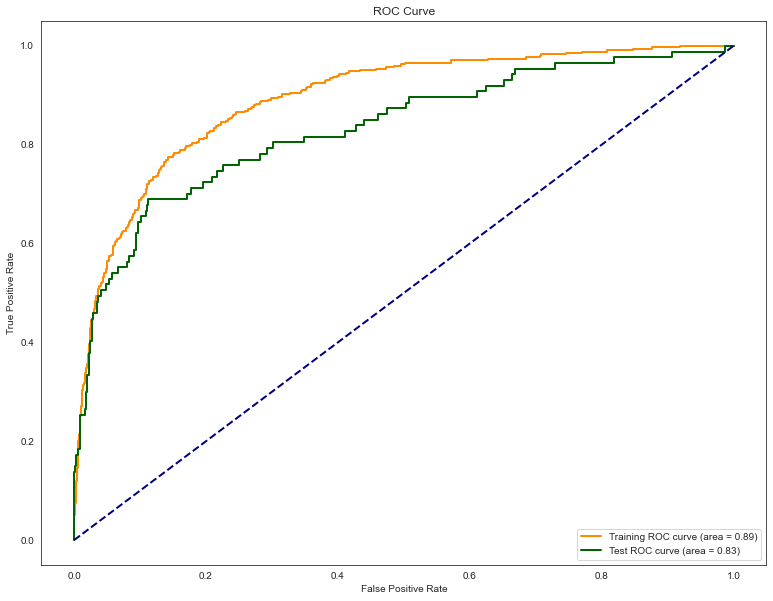

AUC Score (Training): 0.891652712769464
AUC Score (Test): 0.8324760271797802


In [95]:
# Evaluate the model and get predicted probabilities
y_pred_proba_train = model.predict(X_train_scaled).flatten()
y_pred_proba_test = model.predict(X_test_scaled).flatten()

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_train)
auc_train = metrics.auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test)
auc_test = metrics.auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(13, 10))

plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (area = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label=f'Test ROC curve (area = {auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

print("AUC Score (Training):", auc_train)
print("AUC Score (Test):", auc_test)

In [168]:
# Use the trained model to make predictions on the test set
model.predict(test_scaled)

35/35 [==============================] - 0s 3ms/step


array([[0.13049874],
       [0.250262  ],
       [0.02789105],
       ...,
       [0.08890038],
       [0.11594759],
       [0.00735061]], dtype=float32)

In [178]:
test_predictions.flatten()

array([0.13049874, 0.250262  , 0.02789105, ..., 0.08890038, 0.11594759,
       0.00735061], dtype=float32)

In [179]:
e_number = pd.read_csv('test.csv')['id']
test_predictions = model.predict(test_scaled)

output = pd.DataFrame({
    'id': e_number, 'Attrition': test_predictions.flatten()
})
output.to_csv('submission_nn.csv', index=False)
print('Successful')

35/35 [==============================] - 0s 3ms/step
Successful


## Feature Selection

**Method 1**

In [42]:
feature_names = list(X_train.columns)
cat_features = [column for column, dtype in X_train.dtypes.items() if dtype==object]

X_train_pool = cb.Pool(X_train, y_train, feature_names=feature_names, cat_features=cat_features)
X_test_pool = cb.Pool(X_test, y_test, feature_names=feature_names, cat_features=cat_features)

In [43]:
from catboost import Pool, EShapCalcType, EFeaturesSelectionAlgorithm

def select_features(X_train, y_train, X_test, y_test, algorithm, num_features_to_select, steps=1):
    print('Algorithm:', algorithm)
    
    feature_names = list(X_train.columns)
    cat_features = [column for column, dtype in X_train.dtypes.items() if dtype == 'object']

    train_pool = Pool(X_train, y_train, feature_names=feature_names, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, feature_names=feature_names, cat_features=cat_features)

    summary = model.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(train_pool.num_col())),
        num_features_to_select=num_features_to_select,
        steps=steps,
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=False,
        logging_level='Silent',
        plot=False
    )

    print('Selected features:\n\n', summary['selected_features_names'])
    return summary

summary = select_features(X_train, y_train, X_test, y_test, 
                          algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues, num_features_to_select=31, steps=1)

Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues

Selected features:



 ['OverTime', 'MonthlyRate', 'StockOptionLevel', 'RelationshipSatisfaction', 'Department', 'YearsAtCompany', 'EnvironmentSatisfaction', 'EducationField', 'MonthlyIncome', 'YearsWithCurrManager', 'JobLevel', 'Gender', 'HourlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'Age', 'WorkLifeBalance', 'JobRole', 'DailyRate', 'JobInvolvement', 'TrainingTimesLastYear', 'BusinessTravel', 'JobSatisfaction', 'YearsInCurrentRole', 'PerformanceRating', 'MaritalStatus', 'DistanceFromHome', 'EduJobInteraction', 'IncomePerExperience', 'JobChangeRate', 'TotalSatisfaction']


In [44]:
print('Selected features indices:', summary['selected_features'], '\n')
print('Selected features names:', summary['selected_features_names'], '\n')
print('Eliminated features indices:', summary['eliminated_features'], '\n')
print('Eliminated features names:', summary['eliminated_features_names'], '\n')

Selected features indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 31, 32, 33, 34] 



Selected features names: ['OverTime', 'MonthlyRate', 'StockOptionLevel', 'RelationshipSatisfaction', 'Department', 'YearsAtCompany', 'EnvironmentSatisfaction', 'EducationField', 'MonthlyIncome', 'YearsWithCurrManager', 'JobLevel', 'Gender', 'HourlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'Age', 'WorkLifeBalance', 'JobRole', 'DailyRate', 'JobInvolvement', 'TrainingTimesLastYear', 'BusinessTravel', 'JobSatisfaction', 'YearsInCurrentRole', 'PerformanceRating', 'MaritalStatus', 'DistanceFromHome', 'EduJobInteraction', 'IncomePerExperience', 'JobChangeRate', 'TotalSatisfaction'] 



Eliminated features indices: [27, 24, 30, 16] 



Eliminated features names: ['YearsSinceLastPromotion', 'Education', 'IncomeToDailyRateRatio', 'NumCompaniesWorked'] 




In [45]:
X_select = X[summary['selected_features_names']]
X_select.head()

,OverTime,MonthlyRate,StockOptionLevel,RelationshipSatisfaction,Department,YearsAtCompany,EnvironmentSatisfaction,EducationField,MonthlyIncome,YearsWithCurrManager,JobLevel,Gender,HourlyRate,PercentSalaryHike,TotalWorkingYears,Age,WorkLifeBalance,JobRole,DailyRate,JobInvolvement,TrainingTimesLastYear,BusinessTravel,JobSatisfaction,YearsInCurrentRole,PerformanceRating,MaritalStatus,DistanceFromHome,EduJobInteraction,IncomePerExperience,JobChangeRate,TotalSatisfaction
0,Yes,5099,1,2,Research & Development,10,4,Medical,2596,8,1,Male,42,13,10,36,3,Laboratory Technician,599,3,2,Travel_Frequently,4,0,3,Married,24,3,259.600000,0.100000,10
1,No,10778,1,4,Sales,4,1,Other,2899,3,1,Male,46,17,4,35,3,Sales Representative,921,3,3,Travel_Rarely,1,2,3,Married,8,3,724.750000,0.250000,6
2,No,16495,2,4,Sales,3,3,Marketing,4627,2,2,Male,80,17,4,32,3,Sales Executive,718,3,3,Travel_Rarely,4,2,3,Divorced,26,6,1156.750000,0.000000,11
3,No,13384,0,3,Research & Development,6,3,Medical,5347,2,2,Female,40,14,15,38,1,Healthcare Representative,1488,3,1,Travel_Rarely,1,0,3,Married,2,6,356.466667,0.200000,7
4,Yes,19805,0,3,Research & Development,31,2,Medical,19033,10,5,Female,37,13,31,50,3,Manager,1017,3,0,Travel_Rarely,1,14,3,Single,5,20,613.967742,0.032258,6


In [46]:
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_select, y, test_size=0.2, random_state=20181224, stratify=y)
print('train: {}\ntest: {}'.format(y_train_select.value_counts(), y_test_select.value_counts()))

train: Attrition

0    2167

1     350

Name: count, dtype: int64

test: Attrition

0    543

1     87

Name: count, dtype: int64


In [47]:
dataset_select = cb.Pool(X_train_select, y_train_select, cat_features=np.where(X_train_select.dtypes == object)[0])

params = {'bagging_temperature': 0.2769796108977284, 'border_count': 107.0, 'depth': 1, 'fold_permutation_block': 0, 'iterations': 650, 
                  'l2_leaf_reg': 2.838607854196691, 'learning_rate': 0.27605154705424995, 'min_child_samples': 18.0, 'one_hot_max_size': 14, 
                  'random_strength': 0.05037755463850015, 'rsm': 0.7406632176361452, 'scale_pos_weight': 1.5522365364323354, 'subsample': 0.731374415726063, 
                  'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'random_seed': 20181224}
params.update({'verbose': False, 'cat_features': cat_features})
# Initialize the model with the best parameters
model_select = cb.CatBoostClassifier(**params)

# Fit the model to the training data
model_select.fit(dataset_select, verbose=False)

# Make predictions on the test set
y_pred_proba_select = model_select.predict_proba(X_test_select)[:, 1]

# Evaluate the model using AUC-ROC
auc_roc_select = roc_auc_score(y_test_select, y_pred_proba_select)
print("AUC-ROC:", auc_roc_select)

AUC-ROC: 0.8389957875574183


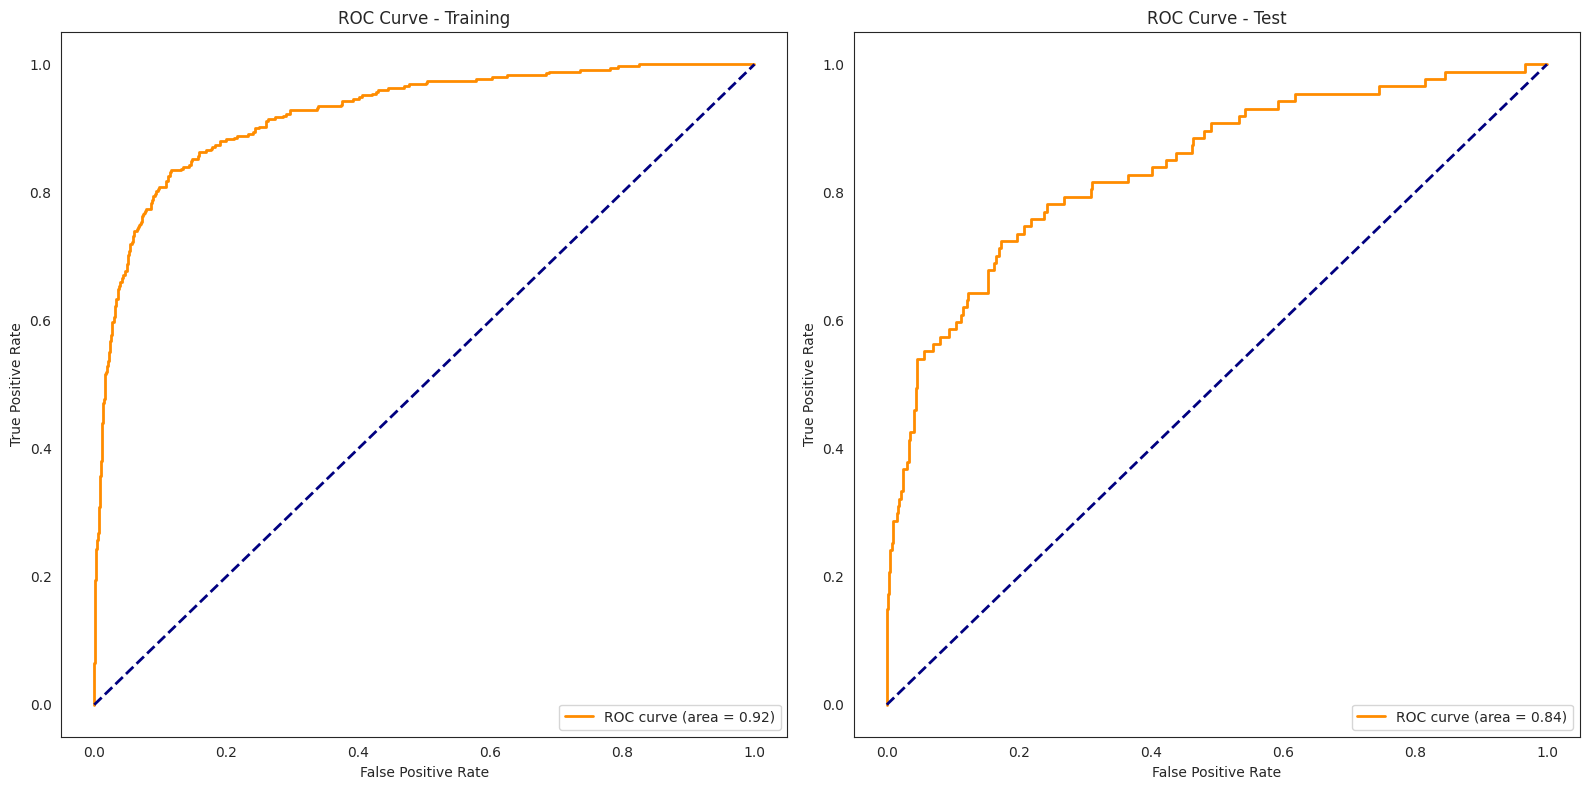

AUC Score (Training): 0.9235163820950623

AUC Score (Test): 0.8389957875574183


In [48]:
import sklearn.metrics as metrics

def calculate_score_on_dataset(X, y, model, dataset_type):
    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes == 'O')[0])
    y_pred_proba = model.predict_proba(dataset)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
    auc_score = metrics.auc(fpr, tpr)

    return fpr, tpr, auc_score

# Calculate scores and ROC curves for both training and test datasets
fpr_train, tpr_train, score_train_cb = calculate_score_on_dataset(X_train_select, y_train_select, model_select, 'Training')
fpr_test, tpr_test, score_test_cb = calculate_score_on_dataset(X_test_select, y_test_select, model_select, 'Test')

# Plot ROC curves in a single row subplot
plt.figure(figsize=(16, 8))

# Plot for Training dataset
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_train_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training')
plt.legend(loc='lower right')

# Plot for Test dataset
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_test_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print("AUC Score (Training):", score_train_cb)
print("AUC Score (Test):", score_test_cb)

In [49]:
# Create a Pool object for the test dataset
test_pool = cb.Pool(test_df, cat_features=np.where(test_df.dtypes == object)[0])

# Use the trained model to make predictions on the test set
y_pred_proba = model_select.predict_proba(test_pool)[:, 1]
y_pred_proba

array([0.15994736, 0.20684818, 0.07452315, ..., 0.01326142, 0.07230848,
       0.00459881])

In [50]:
e_number = test['id']
test_predictions = y_pred_proba
output = pd.DataFrame({
    'id': e_number, 'Attrition': test_predictions
})
output.to_csv('submission.csv', index=False)
print('Successful')

Successful


**Method 2**

In [177]:
cat_features = ['Department', 'EducationField', 'JobRole', 'Gender', 'OverTime', 
                'BusinessTravel', 'MaritalStatus', 'JobDeptInteraction']

# CatBoost
# best_params_cb.update({'verbose': False, 'cat_features': np.where(X.dtypes == 'object')[0]})
params.update({'verbose': False, 'cat_features': cat_features})
print(params)

{'bagging_temperature': 0.2769796108977284, 'border_count': 107.0, 'depth': 1, 'fold_permutation_block': 0, 'iterations': 650, 'l2_leaf_reg': 2.838607854196691, 'learning_rate': 0.27605154705424995, 'min_child_samples': 18.0, 'one_hot_max_size': 14, 'random_strength': 0.05037755463850015, 'rsm': 0.7406632176361452, 'scale_pos_weight': 1.5522365364323354, 'subsample': 0.731374415726063, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'random_seed': 20181224, 'verbose': False, 'cat_features': ['Department', 'EducationField', 'JobRole', 'Gender', 'OverTime', 'BusinessTravel', 'MaritalStatus', 'JobDeptInteraction']}


In [178]:
# Get feature importance
feature_importance = model.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

# Display or analyze feature importance as needed
print("Feature Importance:", feature_importance_dict)

Feature Importance: {'PerformanceRating': 0.0, 'YearsSinceLastPromotion': 2.5760710118202543, 'BusinessTravel': 4.436126136825432, 'JobRole': 6.909106484357706, 'YearsInCurrentRole': 0.3497055574735835, 'JobLevel': 1.5826331993201312, 'DistanceFromHome': 1.7643785853105736, 'StockOptionLevel': 12.843440296851854, 'TotalWorkingYears': 1.0282908610296975, 'RelationshipSatisfaction': 0.18189171236825444, 'MaritalStatus': 0.0, 'HourlyRate': 0.9820001519552435, 'EnvironmentSatisfaction': 1.0198533909982432, 'PercentSalaryHike': 2.02555268503219, 'YearsWithCurrManager': 2.8809346841450205, 'TrainingTimesLastYear': 1.1950608468039567, 'Education': 0.5953441794509736, 'Gender': 0.6839990652025731, 'MonthlyIncome': 5.747229523703726, 'JobSatisfaction': 0.8507535295223674, 'MonthlyRate': 2.7030021590639985, 'OverTime': 9.282893586558808, 'DailyRate': 2.127436544858363, 'JobInvolvement': 3.5533015674605988, 'NumCompaniesWorked': 1.8637319939206558, 'YearsAtCompany': 3.2496946243791087, 'Age': 8.0

In [179]:
feature_names = X.columns.tolist()
df_feature_importance = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature Name', 'Importance Score'])
df_feature_importance = df_feature_importance.sort_values(by='Importance Score', ascending=False, ignore_index=True)
df_feature_importance

,Feature Name,Importance Score
0,StockOptionLevel,12.843440
1,OverTime,9.282894
2,Age,8.037953
3,JobChangeRate,7.990615
4,JobRole,6.909106
5,MonthlyIncome,5.747230
6,TotalSatisfaction,5.185253
7,BusinessTravel,4.436126
8,JobInvolvement,3.553302
9,YearsAtCompany,3.249695


In [180]:
drop = ['PerformanceRating']
X_select2 = X.drop(drop, axis=1)
X_select2.head(2)

,YearsSinceLastPromotion,BusinessTravel,JobRole,YearsInCurrentRole,JobLevel,DistanceFromHome,StockOptionLevel,TotalWorkingYears,RelationshipSatisfaction,MaritalStatus,HourlyRate,EnvironmentSatisfaction,PercentSalaryHike,YearsWithCurrManager,TrainingTimesLastYear,Education,Gender,MonthlyIncome,JobSatisfaction,MonthlyRate,OverTime,DailyRate,JobInvolvement,NumCompaniesWorked,YearsAtCompany,Age,Department,WorkLifeBalance,EducationField,IncomeToDailyRateRatio,EduJobInteraction,IncomePerExperience,JobChangeRate,TotalSatisfaction
0,7,Travel_Frequently,Laboratory Technician,0,1,24,1,10,2,Married,42,4,13,8,2,3,Male,2596,4,5099,Yes,599,3,1,10,36,Research & Development,3,Medical,4.333890,3,259.60,0.10,10
1,0,Travel_Rarely,Sales Representative,2,1,8,1,4,4,Married,46,1,17,3,3,3,Male,2899,1,10778,No,921,3,1,4,35,Sales,3,Other,3.147666,3,724.75,0.25,6


In [181]:
X_train_select2, X_test_select2, y_train_select2, y_test_select2 = train_test_split(X_select2, y, test_size=0.2, random_state=20181224, stratify=y)
print('train: {}\ntest: {}'.format(y_train_select2.value_counts(), y_test_select2.value_counts()))

train: Attrition

0    2167

1     350

Name: count, dtype: int64

test: Attrition

0    543

1     87

Name: count, dtype: int64


In [182]:
cat_features = np.where(X_train_select2.dtypes == object)[0]

params = {'bagging_temperature': 0.2769796108977284, 'border_count': 107.0, 'depth': 1, 'fold_permutation_block': 0, 'iterations': 650, 
                  'l2_leaf_reg': 2.838607854196691, 'learning_rate': 0.27605154705424995, 'min_child_samples': 18.0, 'one_hot_max_size': 14, 
                  'random_strength': 0.05037755463850015, 'rsm': 0.7406632176361452, 'scale_pos_weight': 1.5522365364323354, 'subsample': 0.731374415726063, 
                  'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'random_seed': 20181224}
params.update({'verbose': False, 'cat_features': cat_features})

dataset_select2 = cb.Pool(X_train_select2, y_train_select2, cat_features=cat_features)

# Initialize the model with the best parameters
model_select2 = cb.CatBoostClassifier(**params)

# Fit the model to the training data
model_select2.fit(dataset_select2, verbose=False)

# Make predictions on the test set
y_pred_proba_select2 = model_select2.predict_proba(X_test_select2)[:, 1]

# Evaluate the model using AUC-ROC
auc_roc_select2 = roc_auc_score(y_test_select2, y_pred_proba_select2)
print("AUC-ROC:", auc_roc_select2)

AUC-ROC: 0.8294701636290509


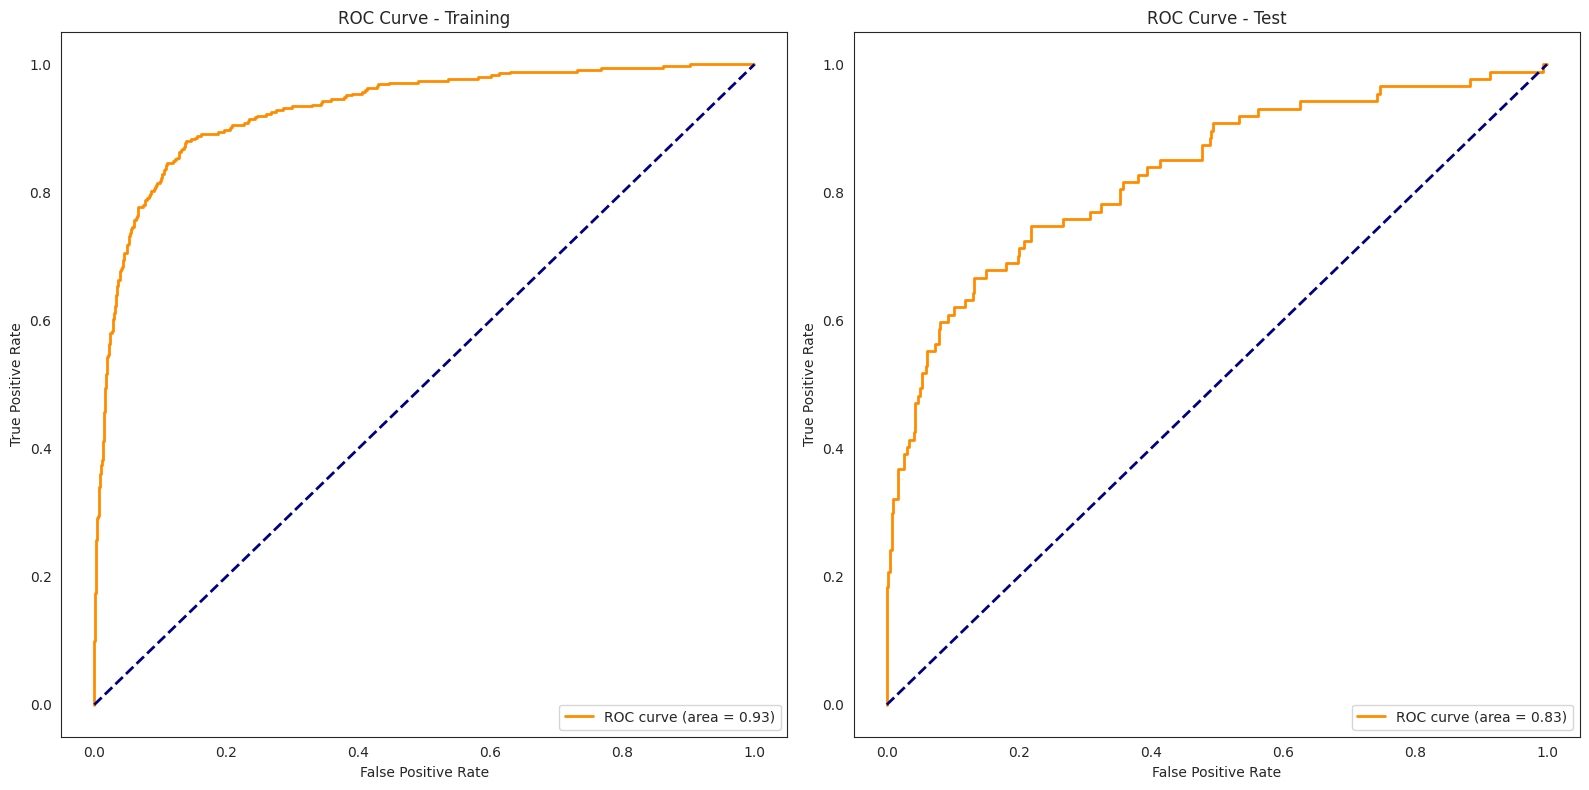

AUC Score (Training): 0.9303975212604655

AUC Score (Test): 0.8294701636290509


In [183]:
import sklearn.metrics as metrics

def calculate_score_on_dataset(X, y, model, dataset_type):
    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes == 'O')[0])
    y_pred_proba = model.predict_proba(dataset)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
    auc_score = metrics.auc(fpr, tpr)

    return fpr, tpr, auc_score

# Calculate scores and ROC curves for both training and test datasets
fpr_train, tpr_train, score_train_cb = calculate_score_on_dataset(X_train_select2, y_train_select2, model_select2, 'Training')
fpr_test, tpr_test, score_test_cb = calculate_score_on_dataset(X_test_select2, y_test_select2, model_select2, 'Test')

# Plot ROC curves in a single row subplot
plt.figure(figsize=(16, 8))

# Plot for Training dataset
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_train_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training')
plt.legend(loc='lower right')

# Plot for Test dataset
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_test_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print("AUC Score (Training):", score_train_cb)
print("AUC Score (Test):", score_test_cb)